In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first few rows of the dataset
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Day 2: Data Cleaning.
# 1. Data cleaning.

# 1.1 Check for null values in columns in data set.

In [4]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 1.2 Handle Missing Values

Decide how to handle missing values. For example, you can drop rows with missing values or fill them with a specific value. If there are only a few missing values, you might choose to drop those rows:

- Drop rows with missing values: 
- If there are many missing values, you might fill them with a value like the mean or median:
- Fill missing values with the median of each column:

In [ ]:
#Drop rows with missing values: 
data.dropna(inplace=True)

#Fill missing values with the median of each column:
data.fillna(data.median(), inplace=True)

# 1.3 Encode Categorical Variables

- Identify catagorical values

In [6]:
# list of catagorical values 
cat_cols = data.select_dtypes(include = ['object']).columns
print(cat_cols)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


- Encode these categorical variables. One common method is one-hot encoding:

In [7]:
# One-hot encode categorical variables
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

In [8]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,...,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_Yes
0,0,1,29.85,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,34,56.95,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,2,53.85,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,45,42.30,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,2,70.70,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


# 1.4 Scale Numerical Features (if necessary)

- identify numerical values

In [9]:
num_cols = data.select_dtypes(include= ['int64', 'float64']).columns
print(num_cols)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


- scale numerical values

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

data[num_cols] = scaler.fit_transform(data[num_cols])

In [12]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,...,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_Yes
0,-0.439916,-1.277445,-1.160323,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.439916,0.066327,-0.259629,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.439916,-1.236724,-0.362660,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,-0.439916,0.514251,-0.746535,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.439916,-1.236724,0.197365,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


# Day 3: EDA

# univariate analysis

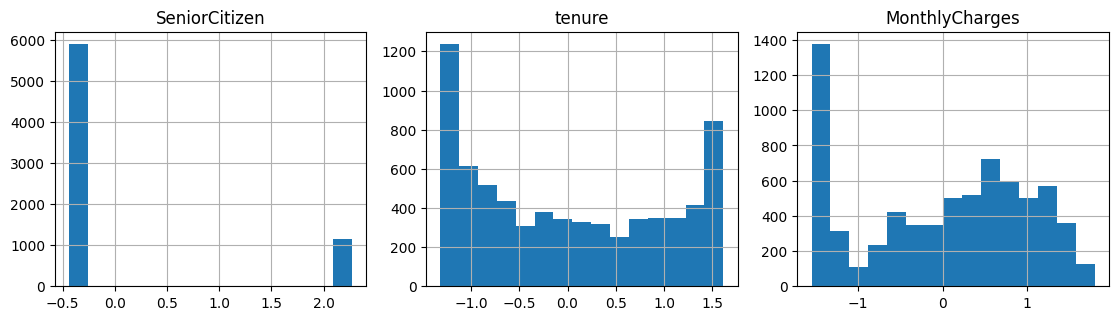

In [13]:
# we start with creating histogram of numerical values

data[num_cols].hist(bins=15, figsize=(15, 6), layout=(2, 4))
plt.tight_layout()
plt.show()

# Bivariate Analysis

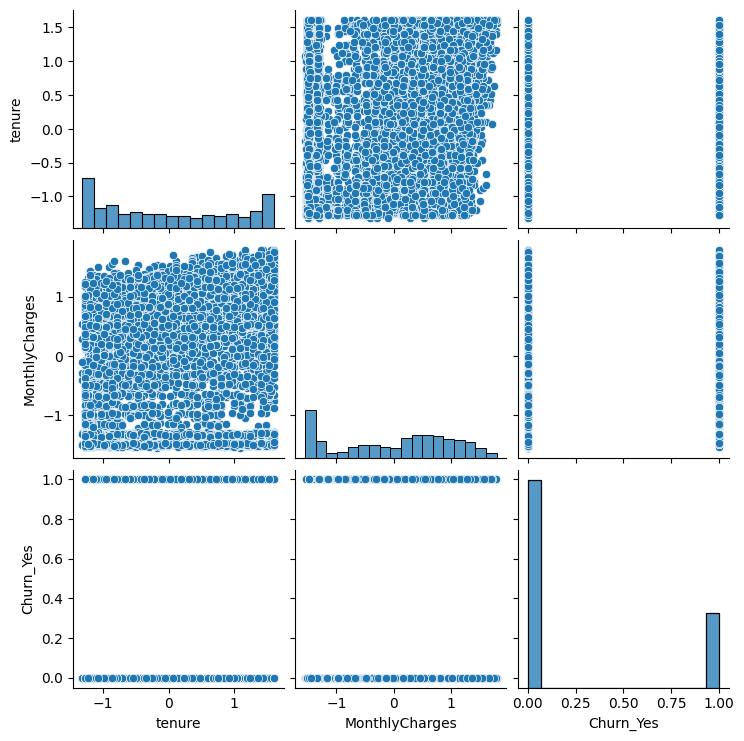

In [18]:
# Create pair plots for a subset of columns (for better visualization)
sns.pairplot(data[['tenure', 'MonthlyCharges', 'Churn_Yes']])
plt.show()

# Target Variable Analysis

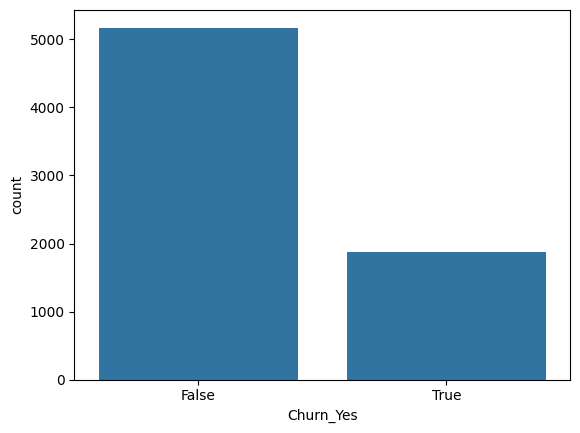

In [16]:
# Analyze the distribution of the target variable
sns.countplot(x='Churn_Yes', data=data)
plt.show()

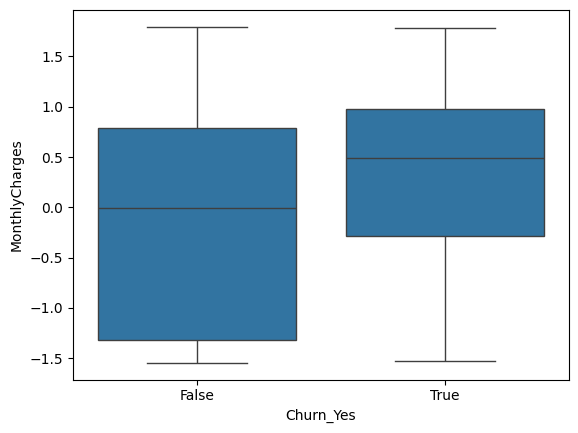

In [17]:
# Relationship between MonthlyCharges and Churn
sns.boxplot(x='Churn_Yes', y='MonthlyCharges', data=data)
plt.show()